In [1]:
!pip install 'zarr<3'
!pip install timm


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


In [6]:
# Cell 3: Import and create dataloaders
from dataset import Config, create_dataloaders

# Just use the correct relative path from your working directory
config = Config("configs/training/config_fold6.yaml")  # Note: "configs" not "config"
config.print_config()

train_loader, val_loader, test_loader = create_dataloaders(config)
print("\n✅ Ready to use!")

CRC DATASET CONFIGURATION
Config File: configs/training/config_fold6.yaml
Zarr Base: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/ORION-CRC/zarr_data
Cache: Disabled
Strategy: memory

📊 Data Splits:
  Train: 45 samples
  Val: 5 samples
  Test: 0 samples

🔄 DataLoader:
  Batch Size: 8
  Num Workers: 0
  Pin Memory: True

🎨 Augmentation:
  Training: False
  Probability: 0.0

🎯 HV Maps:
  Generate: False
  Method: pannuke
  HE Nuclei: False
  HE Cells: False
  MIF Nuclei: False
  MIF Cells: False

🔍 Filtering:
  Min Instances: 0
  Filter Empty: False

CREATING DATALOADERS
Strategy: memory
Use Cache: False
Batch Size: 8
Num Workers: 0

Train split: 37 CRC + 8 Xenium samples
Val split: 4 CRC + 1 Xenium samples
Test split: 0 CRC + 0 Xenium samples

📊 Building patch index for 45 samples...
  ✅ CRC01 (CRC): 36 patches
  ✅ CRC02 (CRC): 75 patches
  ✅ CRC03 (CRC): 43 patches
  ✅ CRC04 (CRC): 118 patches
  ✅ CRC05 (CRC): 696 patches
  ✅ CRC06 (CRC): 147 patches
  ✅ CRC07 (CRC): 130 pa

In [7]:
import torch

# Cell 1: Import IMPROVED GAN trainer
from vitaminp.gan import Pix2PixTrainer  # ← Changed!

# Cell 2: Initialize improved trainer
device = 'cuda' if torch.cuda.is_available() else 'cpu'

trainer = Pix2PixTrainer(  # ← Changed class name!
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    
    # Learning rates (same as before)
    lr_g=2e-4,
    lr_d=2e-4,
    
    # Loss weights (NEW parameters!)
    lambda_l1=100,           # Pixel-wise loss (same as before)
    lambda_perceptual=10,    # ← NEW: VGG perceptual loss
    lambda_ssim=5,           # ← NEW: Structural similarity
    lambda_gradient=5,       # ← NEW: Edge preservation
    
    # Enable advanced features (NEW!)
    use_perceptual=True,     # ← NEW: Much better visual quality
    use_ssim=True,           # ← NEW: Structure preservation
    use_gradient=True,       # ← NEW: Sharp edges
    use_attention=True,      # ← NEW: Attention gates
    use_spectral_norm=True,  # ← NEW: Stable discriminator
    
    # Architecture (NEW!)
    n_residual_blocks=4,     # ← NEW: Residual blocks at bottleneck
    
    # Training optimizations (NEW!)
    mixed_precision=True,    # ← NEW: 2x faster training!
    gradient_clip=5.0,       # ← NEW: More stable gradients
    
    # Logging (same as before)
    use_wandb=False,
    project_name="vitamin-p-gan-improved",  # ← Changed name
    run_name="ImprovedPix2Pix-HE2MIF-512",
    checkpoint_dir="checkpoints_gan"
)

# Cell 3: Train (exactly the same!)
trainer.train(epochs=250)

print("\n✅ Improved GAN training complete!")
print("Model saved in: checkpoints/improved_pix2pix_he_to_mif_best.pth")  # ← New filename
print("\n🎯 Key improvements:")
print("  • Native 512×512 support (no resizing!)")
print("  • Attention gates on skip connections")
print("  • Perceptual + SSIM + Gradient losses")
print("  • Mixed precision training (faster!)")

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🏗️  Building models...
  ✓ Generator params: 74,766,136
  ✓ Discriminator params: 2,768,576
📊 Setting up loss functions...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  ✓ L1 weight: 100
  ✓ Perceptual: Enabled (λ=10)
  ✓ SSIM: Enabled (λ=5)
  ✓ Gradient: Enabled (λ=5)
                          PIX2PIX TRAINING: H&E → SYNTHETIC MIF                           
Epochs: 250 | Mixed Precision: True | Gradient Clip: 5.0


Training:   0%|▏                                                  | 2/595 [00:05<29:19,  2.97s/it, G=143.629, D=0.750, L1=1.073, Perc=2.876]


KeyboardInterrupt: 

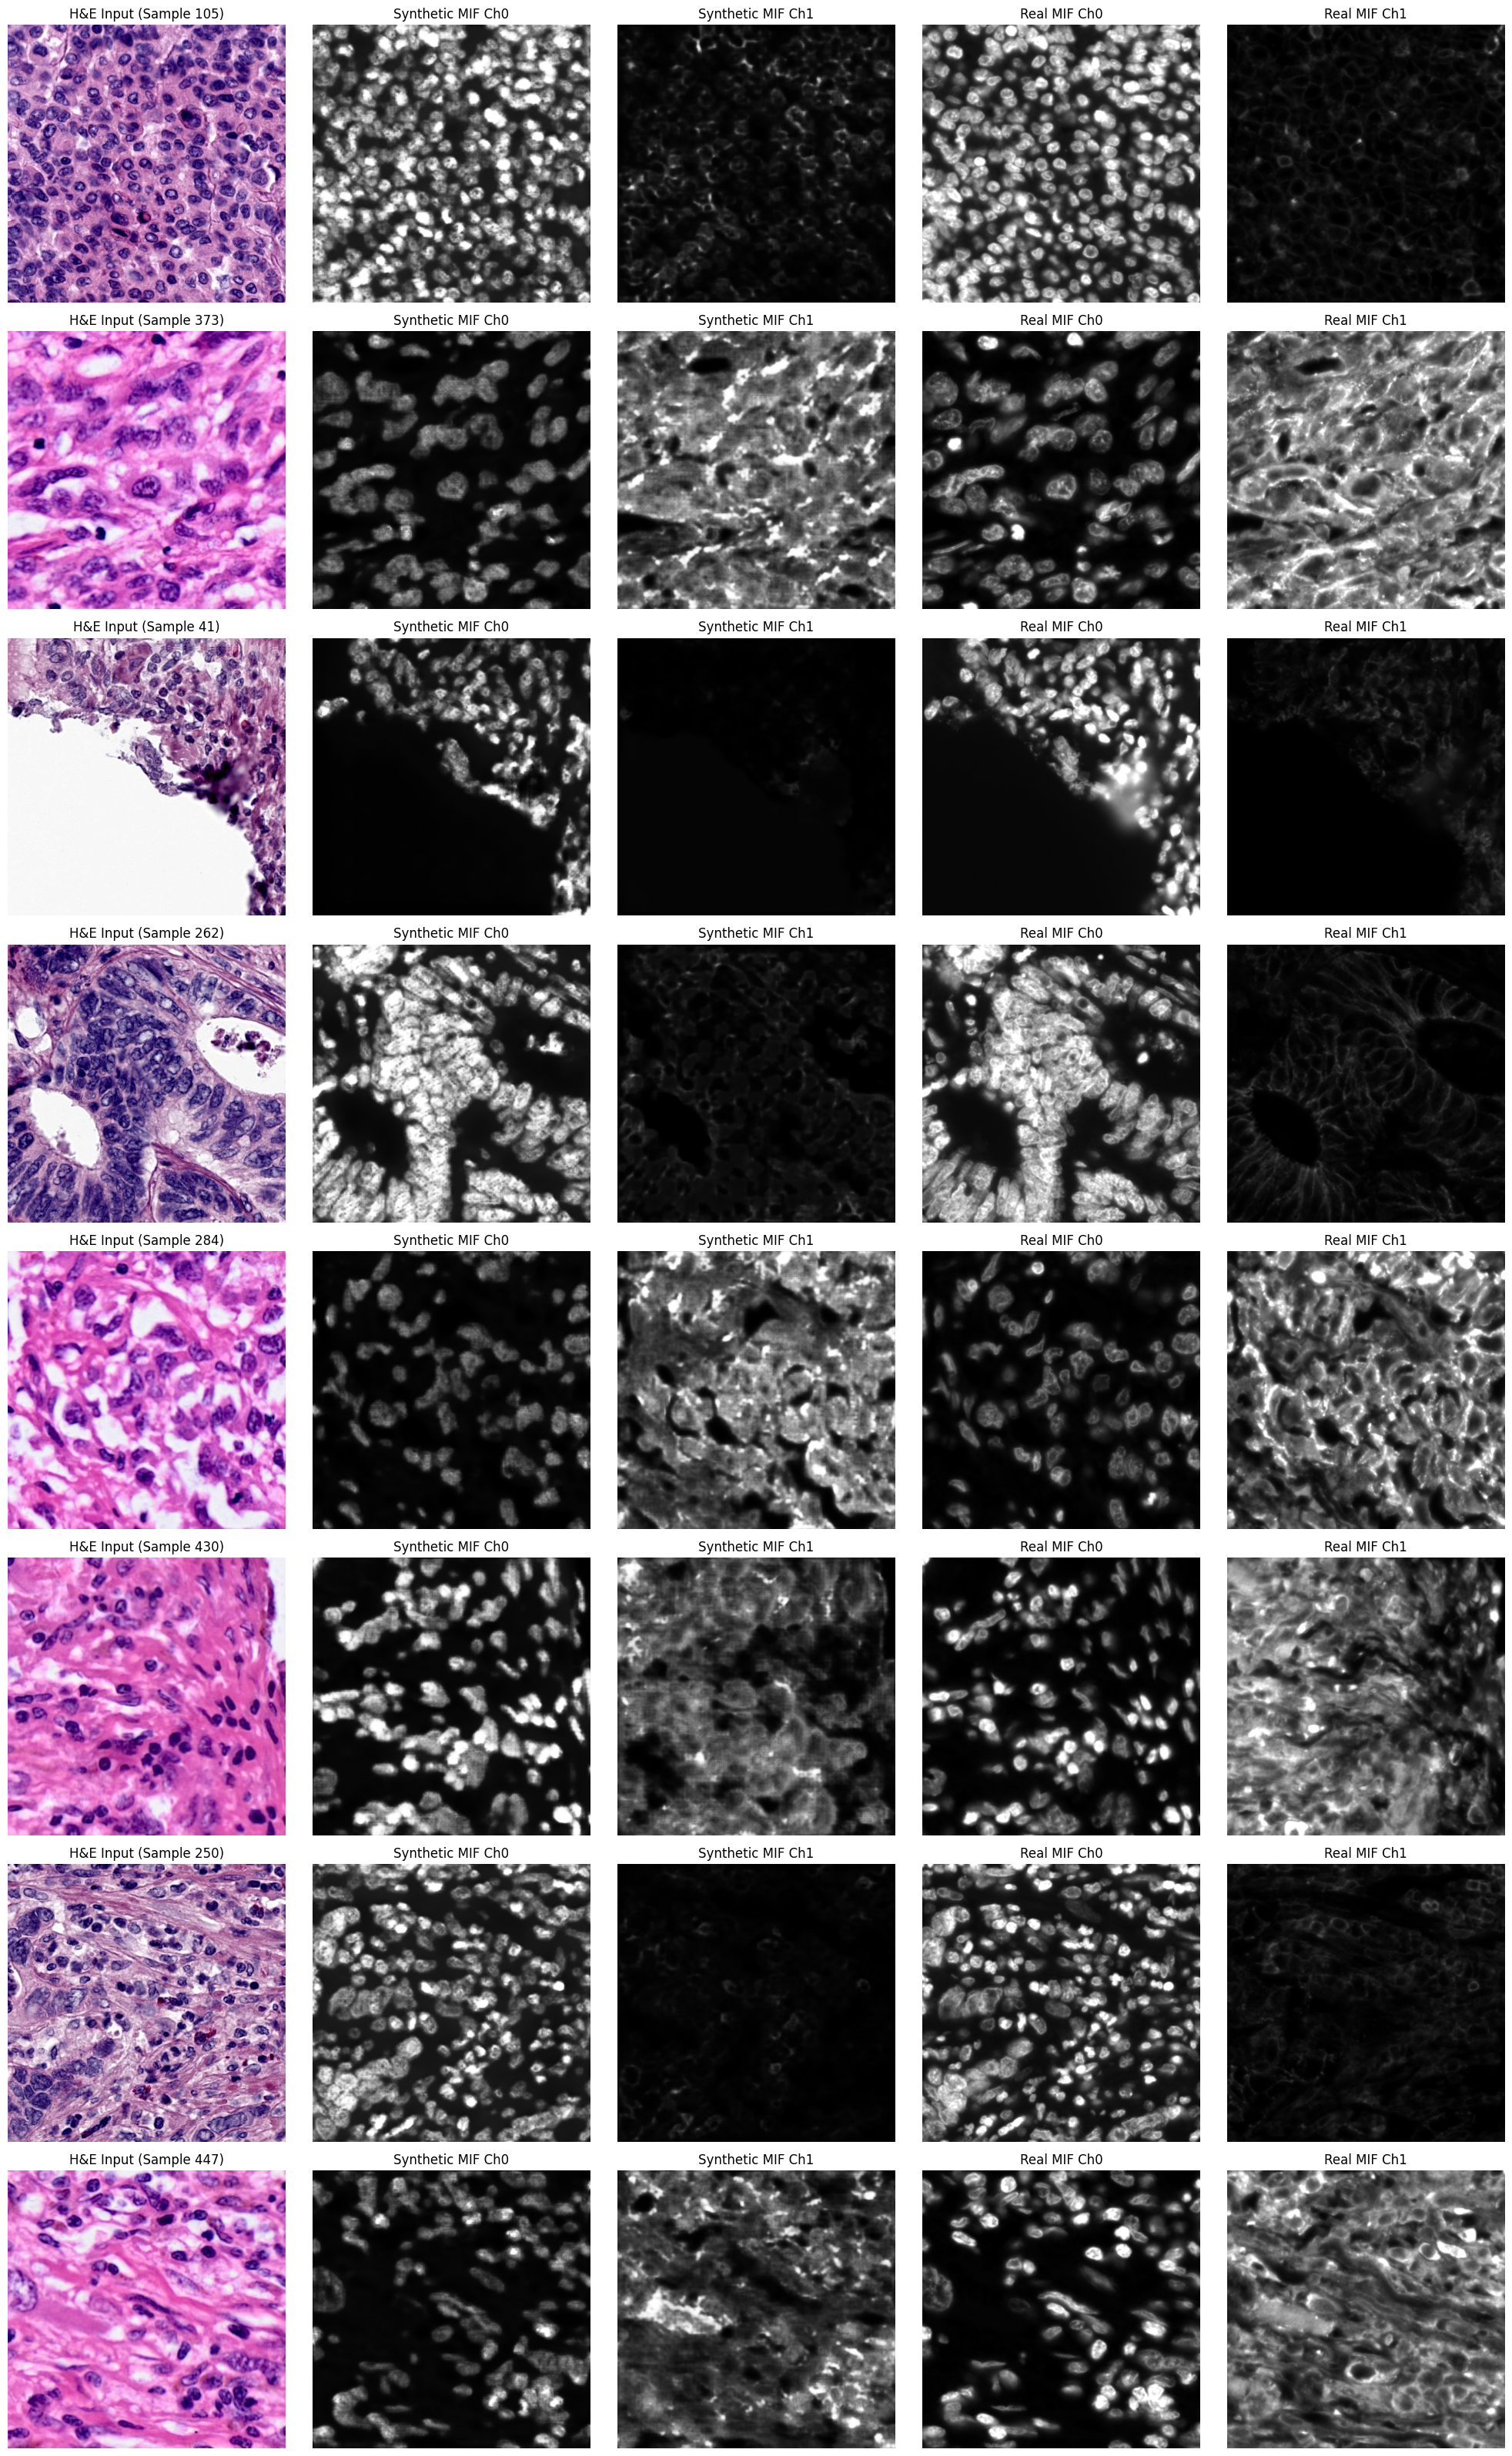

Showing 8 random samples from indices: [105, 373, 41, 262, 284, 430, 250, 447]


In [8]:
# Cell 1: Load trained GAN model
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

from vitaminp.gan import Pix2PixGenerator
from vitaminp.gan.utils import GANPreprocessing

# Load generator
device = 'cuda' if torch.cuda.is_available() else 'cpu'
generator = Pix2PixGenerator(in_channels=3, out_channels=2).to(device)

# Load checkpoint
checkpoint = torch.load('checkpoints/pix2pix_he_to_mif_final.pth', map_location=device)
generator.load_state_dict(checkpoint['generator_state_dict'])
generator.eval()

preprocessor = GANPreprocessing()

# Cell 2: Visualize results with random sampling
@torch.no_grad()
def visualize_gan_results(val_loader, generator, preprocessor, device, num_samples=8):
    """Visualize H&E → Synthetic MIF → Real MIF with random sampling"""
    
    # Collect all validation samples
    all_he = []
    all_mif = []
    
    for batch in val_loader:
        all_he.append(batch['he_image'])
        all_mif.append(batch['mif_image'])
    
    all_he = torch.cat(all_he, dim=0)
    all_mif = torch.cat(all_mif, dim=0)
    
    # Randomly sample indices
    total_samples = all_he.shape[0]
    random_indices = random.sample(range(total_samples), min(num_samples, total_samples))
    
    he_img = all_he[random_indices].to(device)
    real_mif = all_mif[random_indices].to(device)
    
    # Preprocess
    he_norm = preprocessor.percentile_normalize(he_img)
    real_mif_norm = preprocessor.percentile_normalize(real_mif)
    
    # Generate synthetic MIF
    he_gan_input = preprocessor.to_gan_range(he_norm)
    fake_mif = generator(he_gan_input)
    fake_mif_01 = preprocessor.from_gan_range(fake_mif)
    
    # Move to CPU for plotting
    he_norm = he_norm.cpu().numpy()
    real_mif_norm = real_mif_norm.cpu().numpy()
    fake_mif_01 = fake_mif_01.cpu().numpy()
    
    # Plot
    fig, axes = plt.subplots(num_samples, 5, figsize=(20, 4*num_samples))
    
    for i in range(num_samples):
        # H&E RGB
        axes[i, 0].imshow(np.transpose(he_norm[i], (1, 2, 0)))
        axes[i, 0].set_title(f'H&E Input (Sample {random_indices[i]})')
        axes[i, 0].axis('off')
        
        # Synthetic MIF channel 0
        axes[i, 1].imshow(fake_mif_01[i, 0], cmap='gray', vmin=0, vmax=1)
        axes[i, 1].set_title('Synthetic MIF Ch0')
        axes[i, 1].axis('off')
        
        # Synthetic MIF channel 1
        axes[i, 2].imshow(fake_mif_01[i, 1], cmap='gray', vmin=0, vmax=1)
        axes[i, 2].set_title('Synthetic MIF Ch1')
        axes[i, 2].axis('off')
        
        # Real MIF channel 0
        axes[i, 3].imshow(real_mif_norm[i, 0], cmap='gray', vmin=0, vmax=1)
        axes[i, 3].set_title('Real MIF Ch0')
        axes[i, 3].axis('off')
        
        # Real MIF channel 1
        axes[i, 4].imshow(real_mif_norm[i, 1], cmap='gray', vmin=0, vmax=1)
        axes[i, 4].set_title('Real MIF Ch1')
        axes[i, 4].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Showing {num_samples} random samples from indices: {random_indices}")

# Visualize - each run shows different random samples
visualize_gan_results(val_loader, generator, preprocessor, device, num_samples=8)

## Figure

In [11]:
# Cell: GigaTIME-style Multi-Level Evaluation Metrics
import torch
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import cosine
import lpips

class MultiLevelSynthesisMetrics:
    """
    Implements GigaTIME-style evaluation at three levels:
    1. Pixel-level: Image quality metrics
    2. Cell-level: Per-cell marker intensity correlation
    3. Slide-level: Overall distribution matching
    """
    
    def __init__(self, device):
        self.device = device
        self.lpips_fn = lpips.LPIPS(net='alex').to(device)
    
    # ========================================================================
    # LEVEL 1: PIXEL-LEVEL METRICS
    # ========================================================================
    
    def pixel_level_metrics(self, real, fake):
        """
        Pixel-level image quality assessment
        - SSIM: Structural similarity
        - PSNR: Peak signal-to-noise ratio
        - LPIPS: Perceptual similarity
        - MSE: Mean squared error
        """
        metrics = {}
        
        # SSIM per sample
        ssim_scores = []
        for i in range(real.shape[0]):
            sample_ssim = []
            for c in range(real.shape[1]):
                score = ssim(real[i, c].cpu().numpy(), 
                           fake[i, c].cpu().numpy(),
                           data_range=1.0)
                sample_ssim.append(score)
            ssim_scores.append(np.mean(sample_ssim))
        
        metrics['SSIM'] = (np.mean(ssim_scores), np.std(ssim_scores))
        
        # PSNR per sample
        psnr_scores = []
        for i in range(real.shape[0]):
            sample_psnr = []
            for c in range(real.shape[1]):
                score = psnr(real[i, c].cpu().numpy(), 
                           fake[i, c].cpu().numpy(),
                           data_range=1.0)
                sample_psnr.append(score)
            psnr_scores.append(np.mean(sample_psnr))
        
        metrics['PSNR'] = (np.mean(psnr_scores), np.std(psnr_scores))
        
        # LPIPS (perceptual)
        if real.shape[1] == 2:
            real_3ch = torch.cat([real, real[:, :1]], dim=1)
            fake_3ch = torch.cat([fake, fake[:, :1]], dim=1)
        else:
            real_3ch = real
            fake_3ch = fake
        
        real_norm = (real_3ch * 2) - 1
        fake_norm = (fake_3ch * 2) - 1
        
        with torch.no_grad():
            lpips_scores = self.lpips_fn(real_norm, fake_norm)
        
        metrics['LPIPS'] = (lpips_scores.mean().item(), lpips_scores.std().item())
        
        # MSE
        mse = torch.mean((real - fake) ** 2, dim=[1, 2, 3])
        metrics['MSE'] = (mse.mean().item(), mse.std().item())
        
        return metrics
    
    # ========================================================================
    # LEVEL 2: CELL-LEVEL METRICS
    # ========================================================================
    
    def cell_level_metrics(self, real, fake, cell_masks=None):
        """
        Cell-level marker intensity correlation
        - Pearson correlation per cell
        - Spearman correlation per cell
        - Mean Absolute Error per cell
        
        If cell_masks provided, compute per-cell statistics
        Otherwise, compute patch-level correlations
        """
        metrics = {}
        
        if cell_masks is not None:
            # Per-cell analysis (if you have cell segmentation masks)
            cell_correlations = self._compute_per_cell_correlations(real, fake, cell_masks)
            metrics.update(cell_correlations)
        else:
            # Patch-level correlations as proxy
            pearson_corrs = []
            spearman_corrs = []
            
            for i in range(real.shape[0]):
                for c in range(real.shape[1]):
                    r_flat = real[i, c].cpu().numpy().flatten()
                    f_flat = fake[i, c].cpu().numpy().flatten()
                    
                    # Pearson correlation
                    p_corr, _ = pearsonr(r_flat, f_flat)
                    pearson_corrs.append(p_corr)
                    
                    # Spearman correlation
                    s_corr, _ = spearmanr(r_flat, f_flat)
                    spearman_corrs.append(s_corr)
            
            metrics['Pearson_Correlation'] = (np.mean(pearson_corrs), np.std(pearson_corrs))
            metrics['Spearman_Correlation'] = (np.mean(spearman_corrs), np.std(spearman_corrs))
        
        # Mean Absolute Error per channel
        mae_per_channel = []
        for c in range(real.shape[1]):
            mae = torch.abs(real[:, c] - fake[:, c]).mean()
            mae_per_channel.append(mae.item())
        
        metrics['MAE_per_channel'] = mae_per_channel
        metrics['MAE_avg'] = (np.mean(mae_per_channel), np.std(mae_per_channel))
        
        return metrics
    
    def _compute_per_cell_correlations(self, real, fake, cell_masks):
        """Compute correlation for each individual cell"""
        # This would require cell segmentation masks
        # Placeholder for when you have cell masks
        pass
    
    # ========================================================================
    # LEVEL 3: SLIDE-LEVEL METRICS
    # ========================================================================
    
    def slide_level_metrics(self, real, fake):
        """
        Slide-level distribution matching
        - Overall intensity distribution similarity
        - Channel-wise statistics matching
        - Cosine similarity of feature distributions
        """
        metrics = {}
        
        # Overall intensity statistics
        real_mean = real.mean(dim=[2, 3])  # [B, C]
        fake_mean = fake.mean(dim=[2, 3])
        
        real_std = real.std(dim=[2, 3])
        fake_std = fake.std(dim=[2, 3])
        
        # Mean intensity correlation across samples
        mean_corr = []
        for c in range(real.shape[1]):
            corr, _ = pearsonr(real_mean[:, c].cpu().numpy(), 
                             fake_mean[:, c].cpu().numpy())
            mean_corr.append(corr)
        
        metrics['Mean_Intensity_Correlation'] = (np.mean(mean_corr), np.std(mean_corr))
        
        # Standard deviation correlation
        std_corr = []
        for c in range(real.shape[1]):
            corr, _ = pearsonr(real_std[:, c].cpu().numpy(), 
                             fake_std[:, c].cpu().numpy())
            std_corr.append(corr)
        
        metrics['Std_Intensity_Correlation'] = (np.mean(std_corr), np.std(std_corr))
        
        # Histogram similarity (per channel)
        hist_similarities = []
        for c in range(real.shape[1]):
            for i in range(real.shape[0]):
                real_hist, _ = np.histogram(real[i, c].cpu().numpy().flatten(), 
                                           bins=50, range=(0, 1), density=True)
                fake_hist, _ = np.histogram(fake[i, c].cpu().numpy().flatten(), 
                                           bins=50, range=(0, 1), density=True)
                
                # Cosine similarity between histograms
                cos_sim = 1 - cosine(real_hist, fake_hist)
                hist_similarities.append(cos_sim)
        
        metrics['Histogram_Similarity'] = (np.mean(hist_similarities), np.std(hist_similarities))
        
        return metrics
    
    # ========================================================================
    # COMBINED EVALUATION
    # ========================================================================
    
    def evaluate_all_levels(self, real, fake, cell_masks=None):
        """Comprehensive multi-level evaluation"""
        
        print("\n" + "="*80)
        print("MULTI-LEVEL SYNTHESIS EVALUATION (GigaTIME-style)")
        print("="*80)
        
        results = {
            'pixel_level': self.pixel_level_metrics(real, fake),
            'cell_level': self.cell_level_metrics(real, fake, cell_masks),
            'slide_level': self.slide_level_metrics(real, fake)
        }
        
        return results


# ========================================================================
# Main Evaluation Function
# ========================================================================

@torch.no_grad()
def evaluate_gigatime_style(data_loader, generator, preprocessor, device):
    """
    Evaluate synthesis using GigaTIME-style multi-level metrics
    """
    
    evaluator = MultiLevelSynthesisMetrics(device)
    generator.eval()
    
    all_real_mif = []
    all_fake_mif = []
    
    print(f"Processing {len(data_loader)} batches...")
    
    for batch_idx, batch in enumerate(data_loader):
        he_img = batch['he_image'].to(device)
        real_mif = batch['mif_image'].to(device)
        
        # Preprocess
        he_norm = preprocessor.percentile_normalize(he_img)
        real_mif_norm = preprocessor.percentile_normalize(real_mif)
        
        # Generate synthetic mIF
        he_gan_input = preprocessor.to_gan_range(he_norm)
        fake_mif = generator(he_gan_input)
        fake_mif_norm = preprocessor.from_gan_range(fake_mif)
        
        all_real_mif.append(real_mif_norm)
        all_fake_mif.append(fake_mif_norm)
        
        if (batch_idx + 1) % 10 == 0:
            print(f"  Processed {batch_idx + 1}/{len(data_loader)} batches")
    
    # Concatenate
    all_real_mif = torch.cat(all_real_mif, dim=0)
    all_fake_mif = torch.cat(all_fake_mif, dim=0)
    
    print(f"\nEvaluating on {all_real_mif.shape[0]} samples...")
    
    # Run multi-level evaluation
    results = evaluator.evaluate_all_levels(all_real_mif, all_fake_mif)
    
    return results, all_real_mif.shape[0]


# ========================================================================
# Run Evaluation
# ========================================================================

print("Running GigaTIME-style evaluation...")
results, n_samples = evaluate_gigatime_style(val_loader, generator, preprocessor, device)

# ========================================================================
# Print Results
# ========================================================================

def print_results(results, n_samples):
    """Print results in organized format"""
    
    print("\n" + "="*80)
    print(f"SYNTHESIS QUALITY EVALUATION (n={n_samples} samples)")
    print("="*80)
    
    print("\n### LEVEL 1: PIXEL-LEVEL IMAGE QUALITY ###")
    print("-" * 80)
    for metric, (mean_val, std_val) in results['pixel_level'].items():
        print(f"{metric:30s}: {mean_val:.4f} ± {std_val:.4f}")
    
    print("\n### LEVEL 2: CELL-LEVEL CORRELATION ###")
    print("-" * 80)
    for metric, value in results['cell_level'].items():
        if metric == 'MAE_per_channel':
            print(f"{metric:30s}: {value}")
        else:
            mean_val, std_val = value
            print(f"{metric:30s}: {mean_val:.4f} ± {std_val:.4f}")
    
    print("\n### LEVEL 3: SLIDE-LEVEL DISTRIBUTION ###")
    print("-" * 80)
    for metric, (mean_val, std_val) in results['slide_level'].items():
        print(f"{metric:30s}: {mean_val:.4f} ± {std_val:.4f}")
    
    print("\n" + "="*80)

print_results(results, n_samples)

# ========================================================================
# Create Summary Table
# ========================================================================

print("\n" + "="*80)
print("SUMMARY FOR MANUSCRIPT")
print("="*80)

summary = {
    'Pixel-Level (SSIM)': results['pixel_level']['SSIM'],
    'Pixel-Level (PSNR)': results['pixel_level']['PSNR'],
    'Cell-Level (Pearson r)': results['cell_level']['Pearson_Correlation'],
    'Slide-Level (Histogram)': results['slide_level']['Histogram_Similarity']
}

print("\nKey Metrics Summary:")
for metric, (mean_val, std_val) in summary.items():
    print(f"  {metric:30s}: {mean_val:.3f} ± {std_val:.3f}")

print(f"\nn = {n_samples} validation samples")
print("="*80)

Running GigaTIME-style evaluation...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/yshokrollahi/.local/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Processing 61 batches...
  Processed 10/61 batches
  Processed 20/61 batches
  Processed 30/61 batches
  Processed 40/61 batches
  Processed 50/61 batches
  Processed 60/61 batches

Evaluating on 486 samples...

MULTI-LEVEL SYNTHESIS EVALUATION (GigaTIME-style)

SYNTHESIS QUALITY EVALUATION (n=486 samples)

### LEVEL 1: PIXEL-LEVEL IMAGE QUALITY ###
--------------------------------------------------------------------------------
SSIM                          : 0.5460 ± 0.0758
PSNR                          : 19.8263 ± 3.0524
LPIPS                         : 0.2503 ± 0.0929
MSE                           : 0.0188 ± 0.0115

### LEVEL 2: CELL-LEVEL CORRELATION ###
--------------------------------------------------------------------------------
Pearson_Correlation           : 0.5942 ± 0.3115
Spearman_Correlation          : 0.6178 ± 0.3136
MAE_per_channel               : [0.07114491611719131,

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

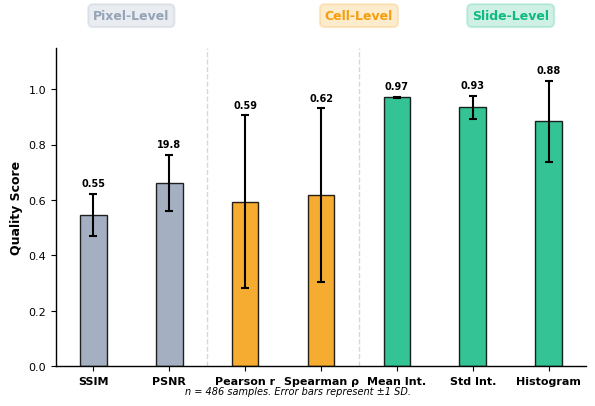


✓ Saved: Fig_Synthesis_MultiLevel_Nature.{png,pdf,eps,svg}
  Resolution: 600 DPI for print quality


In [12]:
# Cell: Create Nature-quality multi-level results figure with vertical bars

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def create_nature_quality_figure(results, n_samples):
    """
    Create Nature Methods style figure with vertical grouped bars
    showing hierarchical quality assessment from pixel → cell → slide level
    """
    
    # Set Nature journal style
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 8
    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Define colors for each level (professional palette)
    colors = {
        'pixel': '#94A3B8',      # Slate gray (moderate)
        'cell': '#F59E0B',       # Amber (good)
        'slide': '#10B981'       # Emerald (excellent)
    }
    
    # Prepare data
    metrics = []
    means = []
    stds = []
    levels = []
    
    # Pixel-level metrics (normalized)
    metrics.extend(['SSIM', 'PSNR'])
    means.extend([
        results['pixel_level']['SSIM'][0],
        results['pixel_level']['PSNR'][0] / 30  # Normalize PSNR to 0-1
    ])
    stds.extend([
        results['pixel_level']['SSIM'][1],
        results['pixel_level']['PSNR'][1] / 30
    ])
    levels.extend(['Pixel', 'Pixel'])
    
    # Cell-level metrics
    metrics.extend(['Pearson r', 'Spearman ρ'])
    means.extend([
        results['cell_level']['Pearson_Correlation'][0],
        results['cell_level']['Spearman_Correlation'][0]
    ])
    stds.extend([
        results['cell_level']['Pearson_Correlation'][1],
        results['cell_level']['Spearman_Correlation'][1]
    ])
    levels.extend(['Cell', 'Cell'])
    
    # Slide-level metrics
    metrics.extend(['Mean Int.', 'Std Int.', 'Histogram'])
    means.extend([
        results['slide_level']['Mean_Intensity_Correlation'][0],
        results['slide_level']['Std_Intensity_Correlation'][0],
        results['slide_level']['Histogram_Similarity'][0]
    ])
    stds.extend([
        results['slide_level']['Mean_Intensity_Correlation'][1],
        results['slide_level']['Std_Intensity_Correlation'][1],
        results['slide_level']['Histogram_Similarity'][1]
    ])
    levels.extend(['Slide', 'Slide', 'Slide'])
    
    # Create positions
    x_pos = np.arange(len(metrics))
    
    # Assign colors based on level
    bar_colors = []
    for level in levels:
        if level == 'Pixel':
            bar_colors.append(colors['pixel'])
        elif level == 'Cell':
            bar_colors.append(colors['cell'])
        else:
            bar_colors.append(colors['slide'])
    
    # Create bars (much thinner)
    bars = ax.bar(x_pos, means, yerr=stds, 
                  color=bar_colors, alpha=0.85,
                  edgecolor='black', linewidth=1,
                  error_kw={'linewidth': 1.5, 'capsize': 3, 'capthick': 1.5},
                  width=0.35)
    
    # Add value labels on top of bars
    for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
        if metrics[i] == 'PSNR':
            # Show original PSNR value
            actual_value = results['pixel_level']['PSNR'][0]
            label = f'{actual_value:.1f}'
        else:
            label = f'{mean:.2f}'
        
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02,
                label, ha='center', va='bottom', fontsize=7, weight='bold')
    
    # Customize axes
    ax.set_xticks(x_pos)
    ax.set_xticklabels(metrics, fontsize=8, weight='bold')
    ax.set_ylabel('Quality Score', fontsize=9, weight='bold')
    ax.set_ylim(0, 1.15)
    
    # Add level labels at the top with background boxes
    level_positions = {
        'Pixel': (0.5, 'Pixel-Level', colors['pixel']),
        'Cell': (3.5, 'Cell-Level', colors['cell']),
        'Slide': (5.5, 'Slide-Level', colors['slide'])
    }
    
    for pos, (x, label, color) in level_positions.items():
        ax.text(x, 1.08, label, ha='center', va='bottom', 
                fontsize=9, weight='bold', color=color,
                transform=ax.get_xaxis_transform(),
                bbox=dict(boxstyle='round,pad=0.4', facecolor=color, alpha=0.2, 
                         edgecolor=color, linewidth=1.5))
    
    # Add separator lines between levels
    ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1, alpha=0.3)
    ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=1, alpha=0.3)
    
    # Spines only (no grid)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    
    # Add sample size note
    fig.text(0.5, 0.01, f'n = {n_samples} samples. Error bars represent ±1 SD.',
             ha='center', fontsize=7, style='italic')
    
    plt.tight_layout()
    
    # Save in multiple formats
    plt.savefig('Fig_Synthesis_MultiLevel_Nature.png', dpi=600, bbox_inches='tight')
    plt.savefig('Fig_Synthesis_MultiLevel_Nature.pdf', bbox_inches='tight')
    plt.savefig('Fig_Synthesis_MultiLevel_Nature.eps', bbox_inches='tight')
    plt.savefig('Fig_Synthesis_MultiLevel_Nature.svg', bbox_inches='tight')
    
    plt.show()
    print("\n✓ Saved: Fig_Synthesis_MultiLevel_Nature.{png,pdf,eps,svg}")
    print("  Resolution: 600 DPI for print quality")

# Create the figure
create_nature_quality_figure(results, n_samples)